<a href="https://colab.research.google.com/github/Suve76/CO2-emmision/blob/main/C0_2_EMISSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
df=pd.read_csv("/content/drive/MyDrive/CO2 Emissions.csv")
df.head()


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [32]:
display(df.head(3))


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [33]:
print(df.columns)


Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [34]:
print(df.duplicated().sum())

1103


In [35]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [36]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [37]:
#Unique Values
for column in df.select_dtypes(include=[object]).columns:
  unique= df[column].unique()
  print (f"Unique values in {column}: \n {unique}\n" )

Unique values in Make: 
 ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']

Unique values in Model: 
 ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']

Unique values in Vehicle Class: 
 ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']

Unique values in Transmission: 
 ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' '

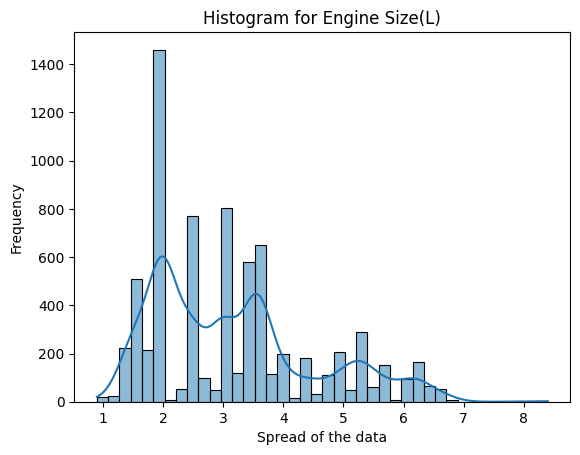

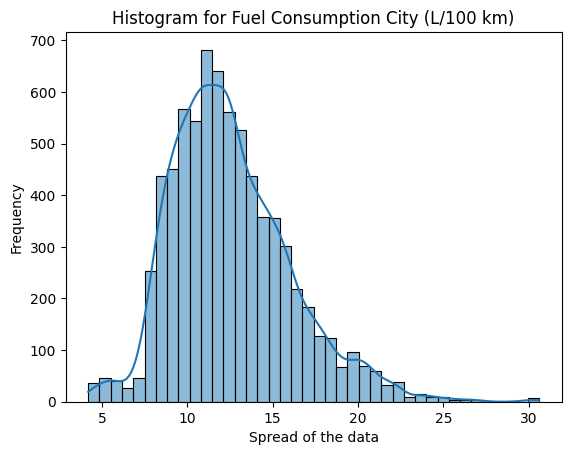

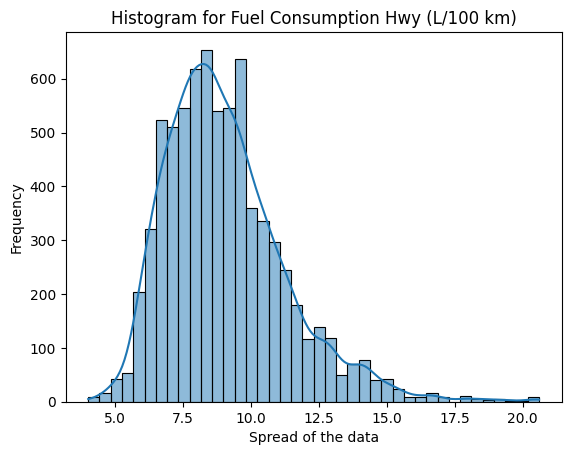

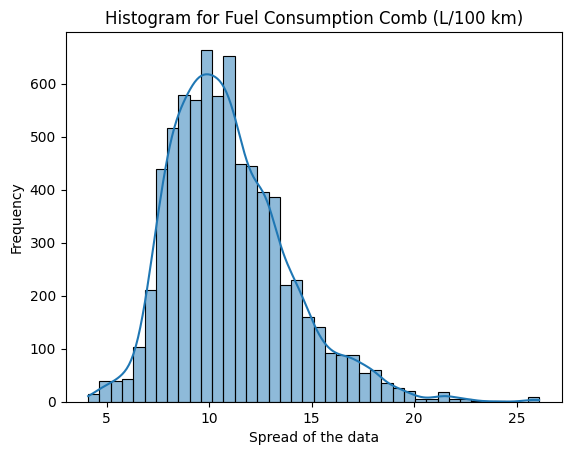

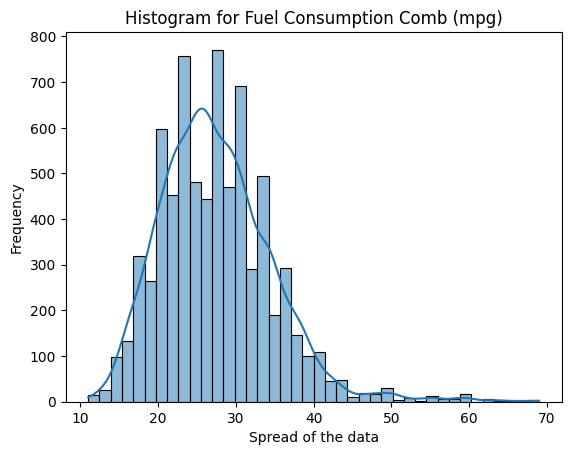

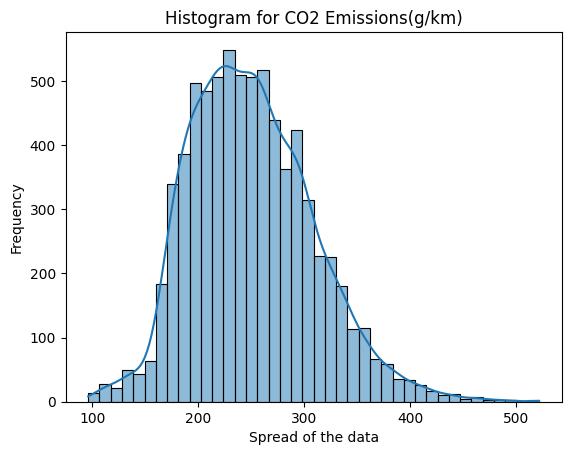

In [38]:
for column in df.select_dtypes(include=[float,int]).columns:
  if df[column].nunique()>30:
    sns.histplot(x=df[column],bins=40,kde=True)
    plt.title(f"Histogram for {column}")
    plt.xlabel("Spread of the data")
    plt.ylabel("Frequency")
    plt.show()

In [39]:
#Kurtosis

for column in df.select_dtypes(include=[float,int]).columns:
  kurtosis_value=stats.kurtosis(df[column])
  print(f"Kurtosis value for {column}:{kurtosis_value} \n")

Kurtosis value for Engine Size(L):-0.13268630398310544 

Kurtosis value for Cylinders:1.5233301845297795 

Kurtosis value for Fuel Consumption City (L/100 km):1.1945229314192831 

Kurtosis value for Fuel Consumption Hwy (L/100 km):2.006796637331628 

Kurtosis value for Fuel Consumption Comb (L/100 km):1.391819664550182 

Kurtosis value for Fuel Consumption Comb (mpg):2.49686481562013 

Kurtosis value for CO2 Emissions(g/km):0.4776643928905786 



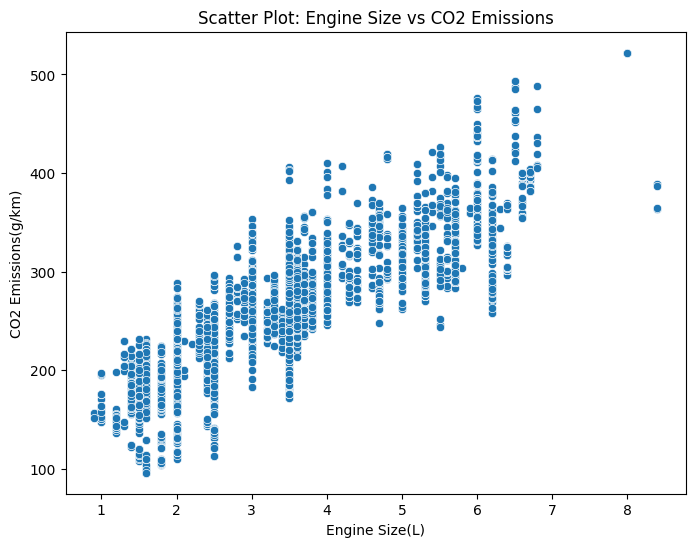

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df)
plt.title('Scatter Plot: Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()


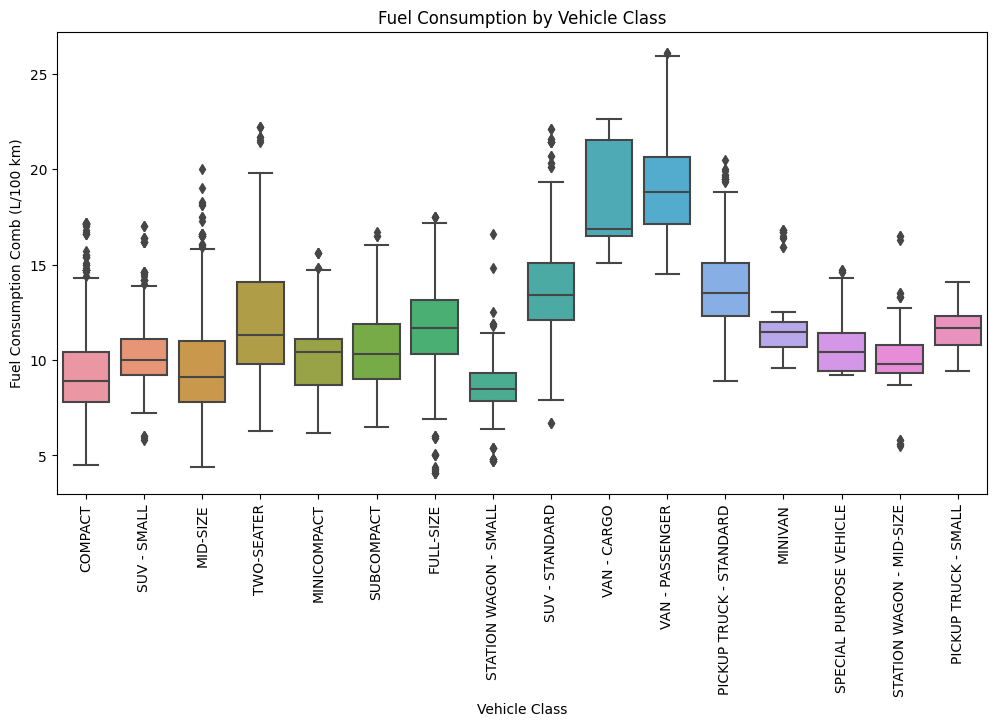

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.xticks(rotation=90)
plt.title('Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.show()

In [42]:
Fuel_city_Make=df.groupby(["Make"]).agg({"Fuel Consumption City (L/100 km)":"mean","Fuel Consumption Hwy (L/100 km)":"mean",'Fuel Consumption Comb (L/100 km)':"mean"}).sort_values(by='Fuel Consumption City (L/100 km)',ascending=False).reset_index()

fig=px.bar(data_frame=Fuel_city_Make.iloc[:20],x='Make',y=["Fuel Consumption City (L/100 km)",'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)'],title="<b>Fuel Consumption by Cars in City , Highway , Combination </b>",width=1000,height=500,barmode='group')
fig.update_xaxes(showgrid=False)
fig.update_layout(plot_bgcolor="rgba(0,0,0,0)",paper_bgcolor="rgba(0,0,0,0)")


In [43]:
#Fuel Type - Comparison
Fuel_city_Make=df.groupby(["Fuel Type"]).agg({"Fuel Consumption City (L/100 km)":"median","Fuel Consumption Hwy (L/100 km)":"median",'Fuel Consumption Comb (L/100 km)':"median"}).sort_values(by='Fuel Consumption City (L/100 km)',ascending=False).reset_index()
fig=px.bar(data_frame=Fuel_city_Make.iloc[:20],x='Fuel Type',y=["Fuel Consumption City (L/100 km)",'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)'],title="<b>Fuel Consumption by Cars in City , Highway , Combination </b>",width=1000,height=500,barmode='group')
fig.update_xaxes(showgrid=False)
fig.update_layout(plot_bgcolor="rgba(0,0,0,0)",paper_bgcolor="rgba(0,0,0,0)")

In [44]:
#Correlation
correlation = df.corr()

<ipython-input-44-2f919f393c2b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



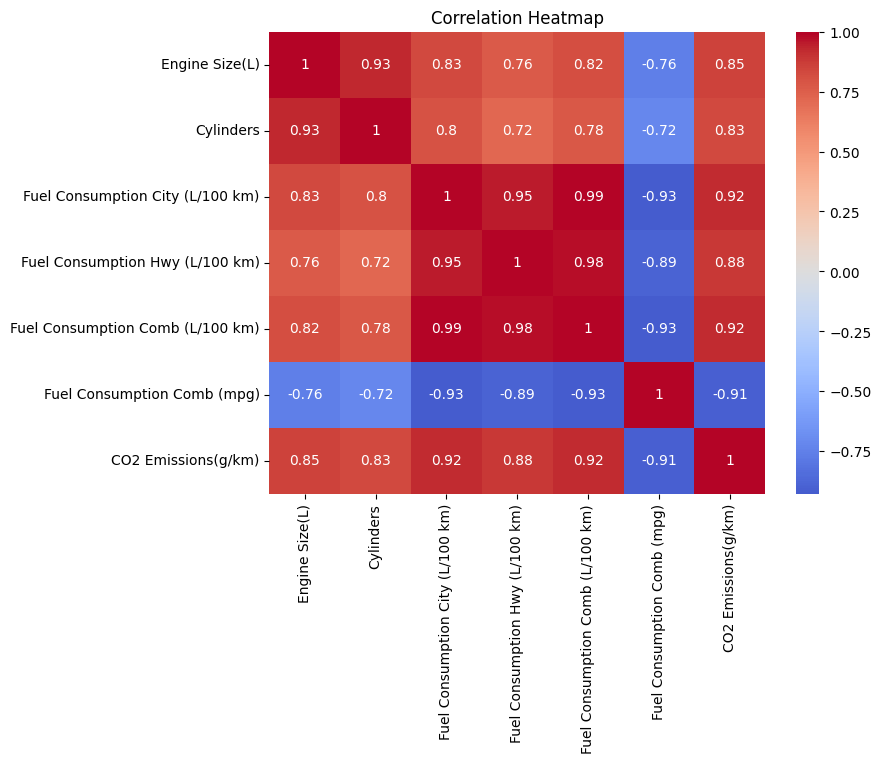

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [46]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [47]:
#Linear Relationship between Engine_Size and CO2 Emission
Engine_Size=px.scatter(data_frame=df,x='Engine Size(L)',y='CO2 Emissions(g/km)',width=1000,height=450,title="<b> Linear Relationship Among the Engine Size and CO2 Emissions(g/Km)",trendline="ols")
Engine_Size.update_layout(plot_bgcolor="rgba(0,0,0,0)",paper_bgcolor="rgba(0,0,0,0)")

In [48]:
#Linear Relationship between Cylinders and CO2 Emission
Cylinders=px.scatter(data_frame=df,x='Cylinders',y='CO2 Emissions(g/km)',width=1000,height=450,title="<b> Linear Relationship Among the Cylinders and CO2 Emissions(g/Km)",trendline="ols")
Cylinders.update_layout(plot_bgcolor="rgba(0,0,0,0)",paper_bgcolor="rgba(0,0,0,0)")

In [49]:
#Linear Relationship between Fuel_Consumption_City and CO2 Emission
Fuel_Consumption_City=px.scatter(data_frame=df,x='Fuel Consumption City (L/100 km)',y='CO2 Emissions(g/km)',width=1000,height=450,title="<b> Linear Relationship Among the Fuel Consumption City and CO2 Emissions(g/Km)",trendline="ols")
Fuel_Consumption_City.update_layout(plot_bgcolor="rgba(0,0,0,0)",paper_bgcolor="rgba(0,0,0,0)")

In [50]:
# Assign the train test split and select the Dependent and Independent Variables

X=df[['Engine Size(L)','Fuel Consumption City (L/100 km)','Cylinders']]
y=df["CO2 Emissions(g/km)"]

X=sm.add_constant(X)

np.random.seed(42)
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=sm.OLS(y_train,X_train).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.874
Model:                             OLS   Adj. R-squared:                  0.874
Method:                  Least Squares   F-statistic:                 1.368e+04
Date:                 Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                         17:44:43   Log-Likelihood:                -26295.
No. Observations:                 5908   AIC:                         5.260e+04
Df Residuals:                     5904   BIC:                         5.263e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have loaded or defined X_test, y_test, and model before this point

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

# Printing the RMSE and R-squared
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)

Root Mean Squared Error (RMSE): 20.99725065917647
R-squared: 0.8718220079938301
